
#Covid_19 Prediction and future Forecasting using FBProphet Model


The dataset used contains statewise data of the number of confirmed cases, deaths and new cases of Covid 19 in India from 31st January, 2020 to June 8th, 2021.


> # Objectives


  

*   The aim of the model is to use the historical data to forecast the number of Active cases for the next 30 days.
*   The below code uses an open source software provided by Facebook for time-series forecast called FBProphet for predicting the number of active cases of covid 19.


> # Table of Contents


1.   Data visualization
2.   Fit the  model
3.   Forecast the data for upcoming 30 days
4.   Cross validation to evaluate performance of model
5.   Performance metrics RMSE, R2 score are obtained

In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [ ]:
#Calculate Active cases
df0 = pd.read_csv("covid_19_india.csv")
df0['Active'] = df0['Confirmed'] - df0['Cured'] - df0['Deaths']
df0.tail() 
df0 = df0.drop(['Sno','ConfirmedIndianNational', 'ConfirmedForeignNational','Cured','Deaths'], axis=1)
df0.head()
print(df0)


             Date     Time State/UnionTerritory  Confirmed  Active
0      2020-01-30  6:00 PM               Kerala          1       1
1      2020-01-31  6:00 PM               Kerala          1       1
2      2020-02-01  6:00 PM               Kerala          2       2
3      2020-02-02  6:00 PM               Kerala          3       3
4      2020-02-03  6:00 PM               Kerala          3       3
...           ...      ...                  ...        ...     ...
15801  2021-06-08  8:00 AM            Telangana     593103   25406
15802  2021-06-08  8:00 AM              Tripura      56169    6018
15803  2021-06-08  8:00 AM          Uttarakhand     334419   14122
15804  2021-06-08  8:00 AM        Uttar Pradesh    1699083   15681
15805  2021-06-08  8:00 AM          West Bengal    1432019   26886

[15806 rows x 5 columns]


              Cases
Date               
2020-01-30        1
2020-01-31        1
2020-02-01        2
2020-02-02        3
2020-02-03        3
...             ...
2021-06-04  1635993
2021-06-05  1555248
2021-06-06  1477799
2021-06-07  1401609
2021-06-08  1303702

[496 rows x 1 columns]


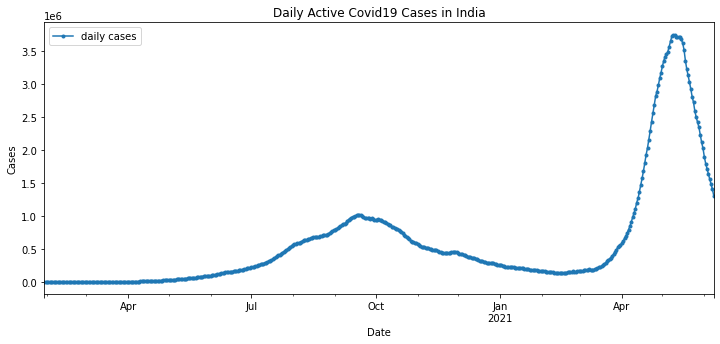

In [ ]:
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,4:].values)))

#Grouping the datewise active cases
df = pd.DataFrame()
df["Date"] = df0.Date
df.Date = pd.to_datetime(df0.Date)
df["Cases"] = df0["Active"]
#df= df.set_index("Date")
df.sort_values(by="Date")
df1=df.groupby(["Date"]).sum()
print(df1)

df1.Cases.plot(title="Daily Active Covid19 Cases in India",marker=".",figsize=(12,5),label="daily cases")
plt.ylabel("Cases")
plt.legend()
plt.show()

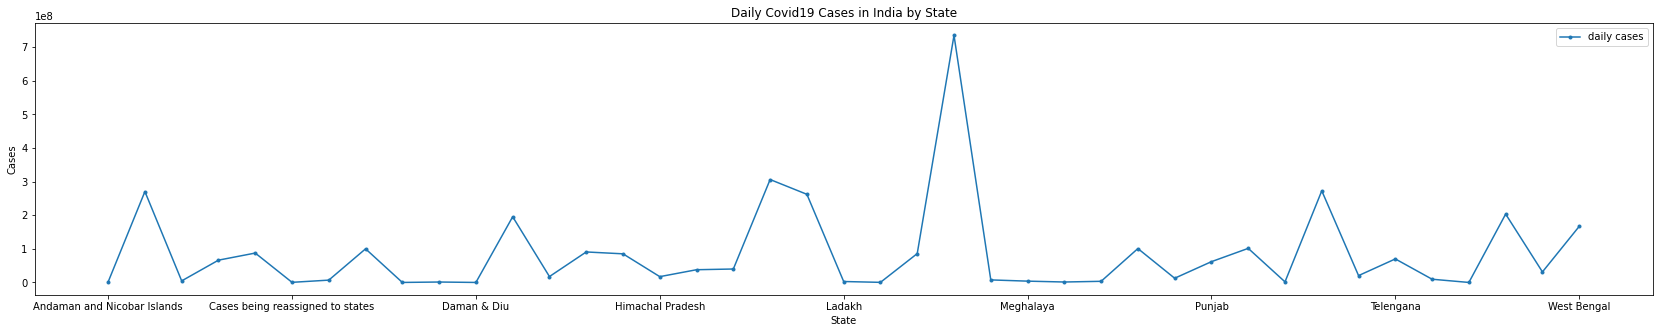

In [ ]:
#Active cases in India statewise
df2 = pd.DataFrame({"State":[],"Cases":[]})
df2["State"]=df0["State/UnionTerritory"][1:]
df2["Cases"]=df0["Confirmed"]
df2= df2.set_index("State")
df3=df2.groupby("State").sum()

df3.Cases.plot(title="Daily Covid19 Cases in India by State",marker=".",figsize=(29,5),label="daily cases")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [ ]:
#Statewise active cases in India grouped by dates
df4 = pd.DataFrame()
df4["Date"] = df0["Date"][1:]
df4["Date"] = pd.to_datetime(df0["Date"])
df4["Cases"] =df0["Active"]
df4["State"] = df0["State/UnionTerritory"][1:]
df5=df4.groupby(["Date","State"]).sum()
print(df5)

                                        Cases
Date       State                             
2020-04-01 Andaman and Nicobar Islands     10
           Assam                            1
           Bihar                           22
           Chandigarh                      16
           Chhattisgarh                     7
...                                       ...
2020-06-07 Tripura                        574
           Uttar Pradesh                 3828
           Uttarakhand                    869
           West Bengal                   4236
2020-06-08 Andaman and Nicobar Islands      0

[2245 rows x 1 columns]


FBProphet model is mainly used for time series forecasts. The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
#Data preparation
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df1.index)
df_fb["y"]  = df1.iloc[:,0].values
print(df_fb)

            ds        y
0   2020-01-30        1
1   2020-01-31        1
2   2020-02-01        2
3   2020-02-02        3
4   2020-02-03        3
..         ...      ...
491 2021-06-04  1635993
492 2021-06-05  1555248
493 2021-06-06  1477799
494 2021-06-07  1401609
495 2021-06-08  1303702

[496 rows x 2 columns]


We are now ready to design and fit our FBProphet model for this problem. We have set the seasonality of the data to 'Daily' and forecast will be done for the next 30 days.

In [ ]:
#Fitting the data into the FBProphet model       
model = Prophet(daily_seasonality=True,weekly_seasonality=False,yearly_seasonality=False)
model.fit(df_fb)
future_dates=model.make_future_dataframe(periods=30)
forecast=model.predict(future_dates)
#forecast = model.predict[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
print((forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)))


              yhat_lower    yhat_upper          yhat
ds                                                  
2021-06-09  2.500327e+06  3.511188e+06  3.040952e+06
2021-06-10  2.593462e+06  3.568564e+06  3.067020e+06
2021-06-11  2.597042e+06  3.595652e+06  3.093089e+06
2021-06-12  2.657883e+06  3.655655e+06  3.119157e+06
2021-06-13  2.628165e+06  3.638828e+06  3.145225e+06
2021-06-14  2.676959e+06  3.696025e+06  3.171294e+06
2021-06-15  2.699341e+06  3.717370e+06  3.197362e+06
2021-06-16  2.717574e+06  3.723544e+06  3.223430e+06
2021-06-17  2.711960e+06  3.729765e+06  3.249499e+06
2021-06-18  2.773173e+06  3.753000e+06  3.275567e+06
2021-06-19  2.814182e+06  3.807836e+06  3.301635e+06
2021-06-20  2.783810e+06  3.837378e+06  3.327703e+06
2021-06-21  2.844534e+06  3.838591e+06  3.353772e+06
2021-06-22  2.867909e+06  3.847307e+06  3.379840e+06
2021-06-23  2.904597e+06  3.932062e+06  3.405908e+06
2021-06-24  2.900896e+06  3.934451e+06  3.431977e+06
2021-06-25  2.970223e+06  3.978615e+06  3.4580

Cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

In [ ]:
#Performing Cross validation by taking training data as 300 days and testing data= 150 days
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial='300 days',horizon='150 days')
df_cv.head()

The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,15 days,1.088132e+09,32986.84884,31490.42522,0.156615,0.167452,0.0


In [ ]:
r2_score(df_cv.y, df_cv.yhat)

0.7072033945354856